In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_set=pd.read_csv('4228525_dataset.csv')
pd.set_option('display.max_columns', None)
data_set
#data_set.describe()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,Name Prefix,Gender,age,Customer Since,County,City,State,Zip,Region,Discount_Percent
0,100432175,04/01/2021,complete,706723,MATIDR59BA5107902DF,2,670.0,670.0,0.0,670.0,Mobiles & Tablets,cod,Net,82148,2021,Jan-21,Mr.,M,50,3/30/2013,Bristol (city),Bristol,VA,24201,South,0.0
1,100432177,04/01/2021,complete,706725,MATROM59D5F67AACC12,3,129.9,259.8,0.0,259.8,Mobiles & Tablets,cod,Net,82149,2021,Jan-21,Mr.,M,45,04/09/2016,Sacramento,Represa,CA,95671,West,0.0
2,100432178,04/01/2021,order_refunded,706726,BAGMAS59B65A5491380,2,999.9,999.9,0.0,999.9,Beauty & Grooming,cod,Valid,82150,2021,Jan-21,Hon.,F,25,2/17/2017,Hughes,Wetumka,OK,74883,South,0.0
3,100432183,04/01/2021,received,706733,MEFBUY59B7E808D2F6A-44,2,69.9,69.9,0.0,69.9,Men's Fashion,cod,Valid,82151,2021,Jan-21,Mr.,M,73,07/07/2004,Grafton,Bristol,NH,3222,Northeast,0.0
4,100432183,04/01/2021,received,706735,MEFDYN5A002978C853B,2,19.9,19.9,0.0,19.9,Men's Fashion,cod,Valid,82151,2021,Jan-21,Mr.,M,73,07/07/2004,Grafton,Bristol,NH,3222,Northeast,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,100433224,07/01/2021,received,708746,BAGRIM5A0197193D0F8,2,125.0,125.0,0.0,125.0,Beauty & Grooming,Easypay,Valid,82442,2021,Jan-21,Ms.,F,42,04/05/2000,Gila,Globe,AZ,85502,West,0.0
1215,100433226,07/01/2021,order_refunded,708749,WOFGUL59AD7B886DABF,2,356.9,356.9,0.0,356.9,Women's Fashion,cod,Valid,82443,2021,Jan-21,Dr.,M,41,11/25/2008,El Paso,Colorado Springs,CO,80935,West,0.0
1216,100433226,07/01/2021,order_refunded,708750,WOFGUL59B7B08532842,2,192.5,192.5,0.0,192.5,Women's Fashion,cod,Valid,82443,2021,Jan-21,Dr.,M,41,11/25/2008,El Paso,Colorado Springs,CO,80935,West,0.0
1217,100433228,07/01/2021,canceled,708752,MEFBNB59FC74FFCBC1B-M,2,24.9,24.9,0.0,24.9,Men's Fashion,jazzvoucher,Gross,82444,2021,Jan-21,Mr.,M,20,12/27/2005,Issaquena,Grace,MS,38745,South,0.0


In [83]:
data_set['status'].value_counts()

complete          495
canceled          411
received          153
order_refunded    123
refund             19
cod                16
paid                2
Name: status, dtype: int64

Text(0.5, 1.0, 'Number of Customers in Each Category')

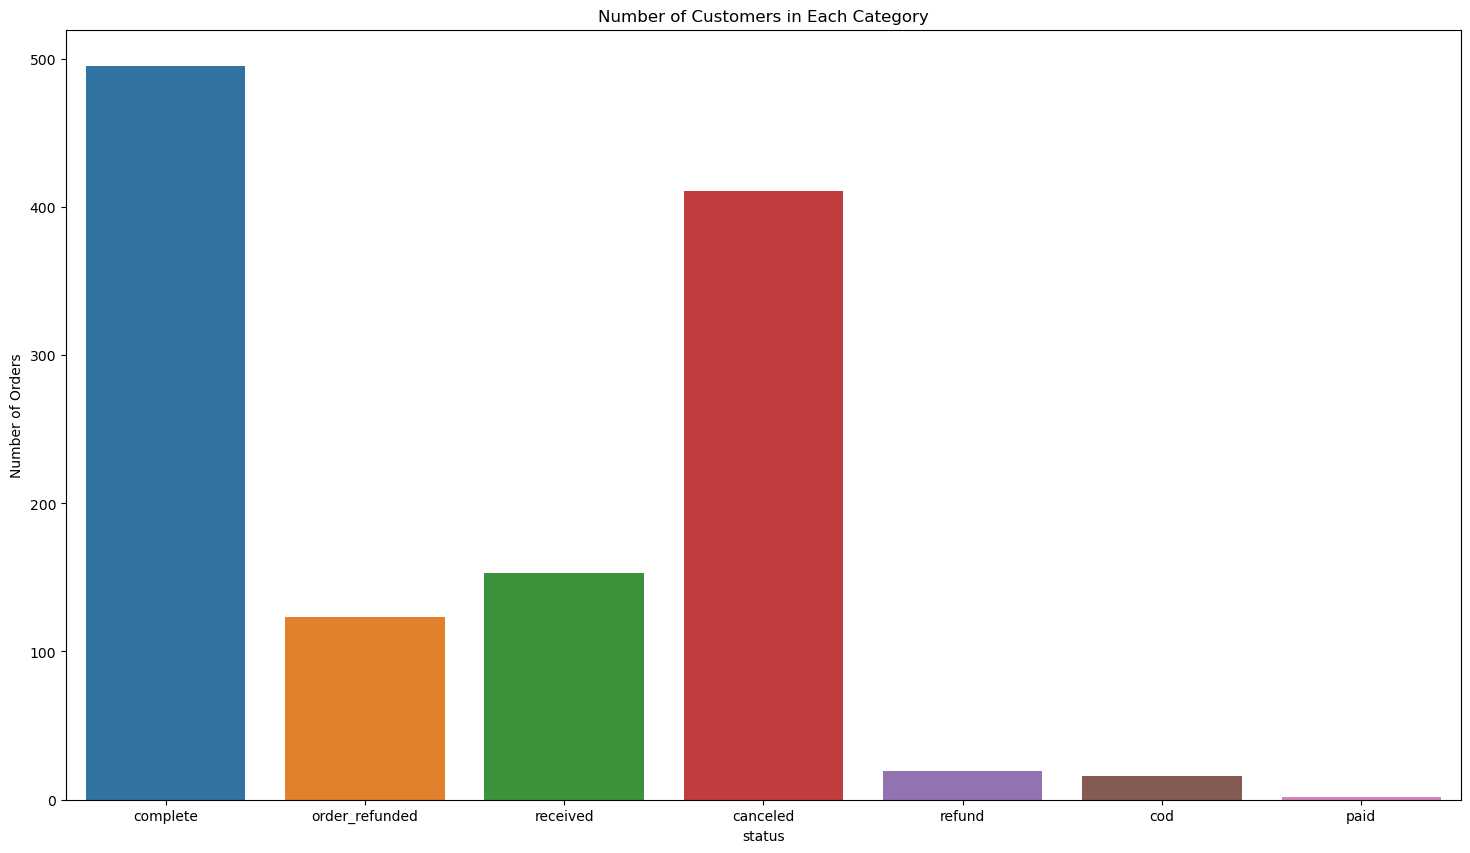

In [85]:
plt.rcParams["figure.figsize"] = (18, 10)
sns.countplot(x='status', data= data_set)
plt.ylabel('Number of Orders')
plt.title('Number of Customers in Each Category')

In [39]:
data_set['Customer Since'].value_counts()

4/26/1996     75
12/17/2005    59
12/14/2015    43
9/20/2012     40
12/29/2015    38
              ..
7/27/2012      1
02/11/2011     1
10/02/2004     1
12/16/2013     1
3/30/2013      1
Name: Customer Since, Length: 329, dtype: int64

In [49]:
filtered_dates = data_set[(data_set['Customer Since'].dt.year >= 2003) & (data_set['Customer Since'].dt.year <= 2015)]
quantity_within_range = filtered_dates.shape[0]
print(quantity_within_range)

702


In [87]:
#Categorizing the customers into 4 groups
def customer_category(tenure):
    if tenure < 7:
        return 'New'
    elif 7 <= tenure < 10:
        return 'Valued'
    elif 10 <= tenure < 15:
        return 'Platinum'
    else:
        return 'Gold'


In [108]:
non_repeating_customers=data_set.drop_duplicates(subset='cust_id')
data_set['Customer Since'] = pd.to_datetime(non_repeating_customers['Customer Since'])
# Calculate tenure in years for each customer
data_set['Tenure'] = (pd.to_datetime('today') - non_repeating_customers['Customer Since']).dt.days // 365
# Categorize customers
data_set['Category'] = non_repeating_customers['Tenure'].apply(customer_category)

# Count the number of customers in each category
category_counts = data_set['Category'].value_counts()

total_customers= non_repeating_customers.shape[0]
print(category_counts)
print('Total Number of Customers Are: ',total_customers)

Gold        161
Valued       76
Platinum     75
New          23
Name: Category, dtype: int64
Total Number of Customers Are:  335


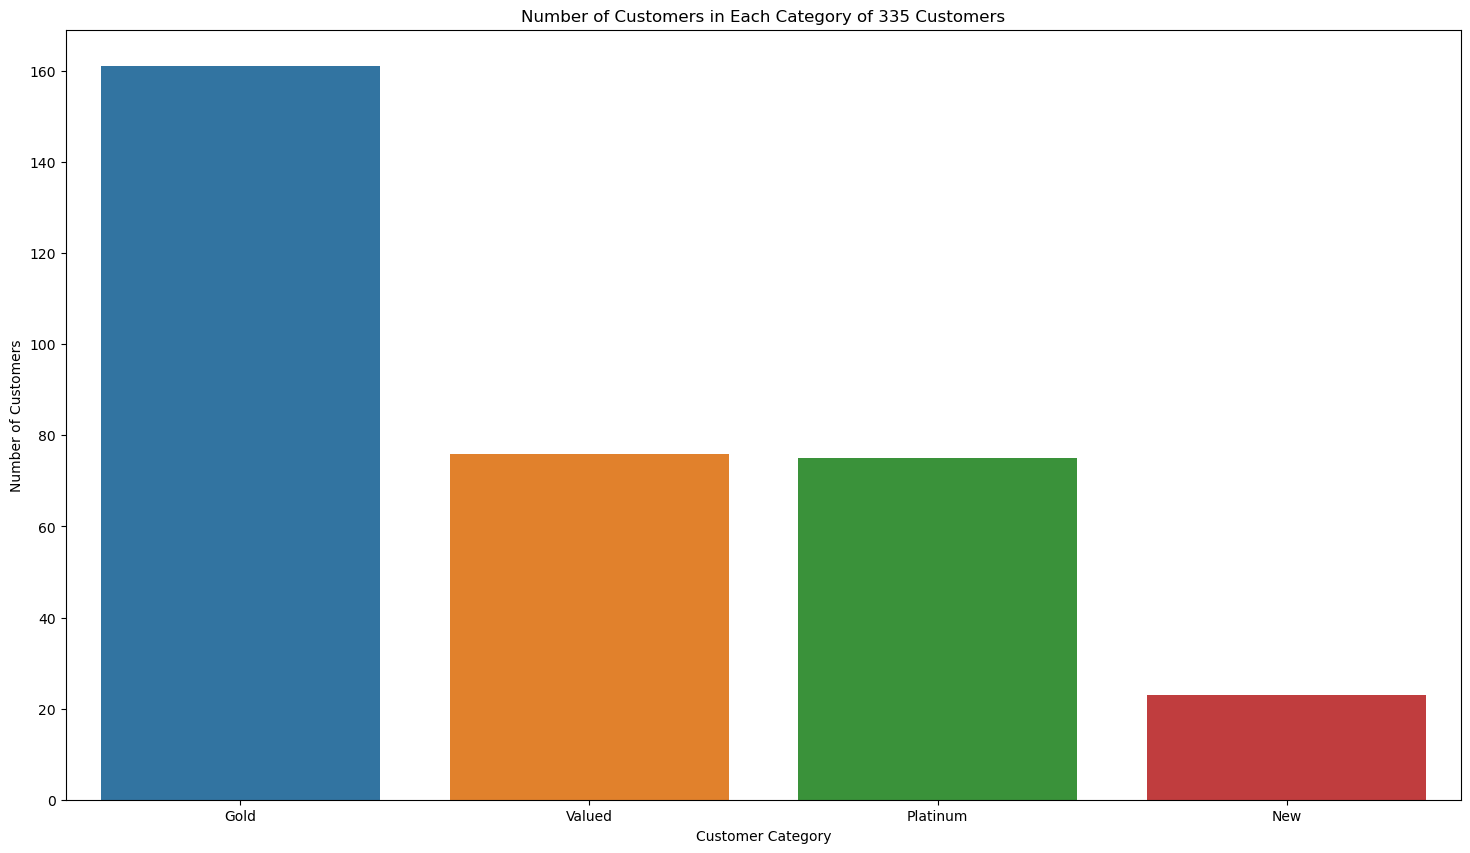

In [114]:
# Plotting the counts
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Category of '+ str(total_customers)+' Customers')
plt.show()

C:\Users\RTX696969\AppData\Local\Temp\ipykernel_7564\1199207871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(),cbar=True, annot=True,cmap='Reds')


<Axes: >

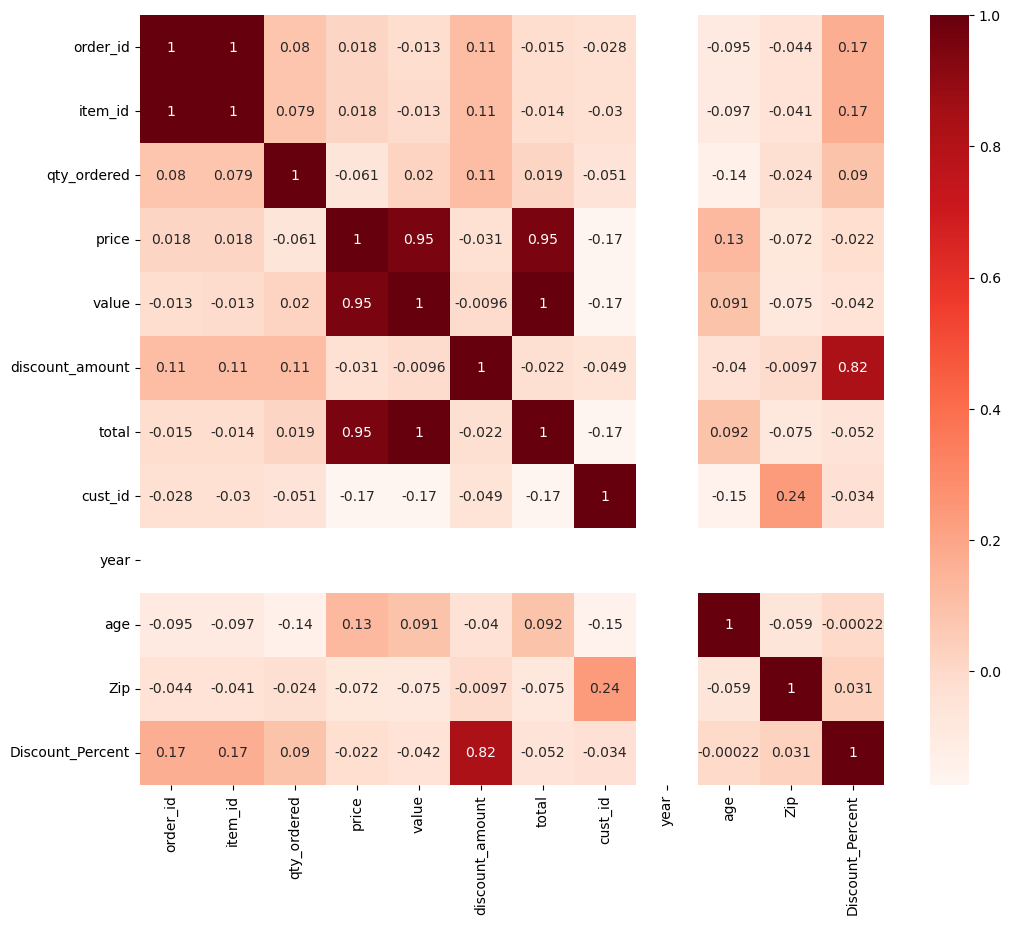

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(data_set.corr(),cbar=True, annot=True,cmap='Reds')

Text(0.5, 0, 'Price of Products')

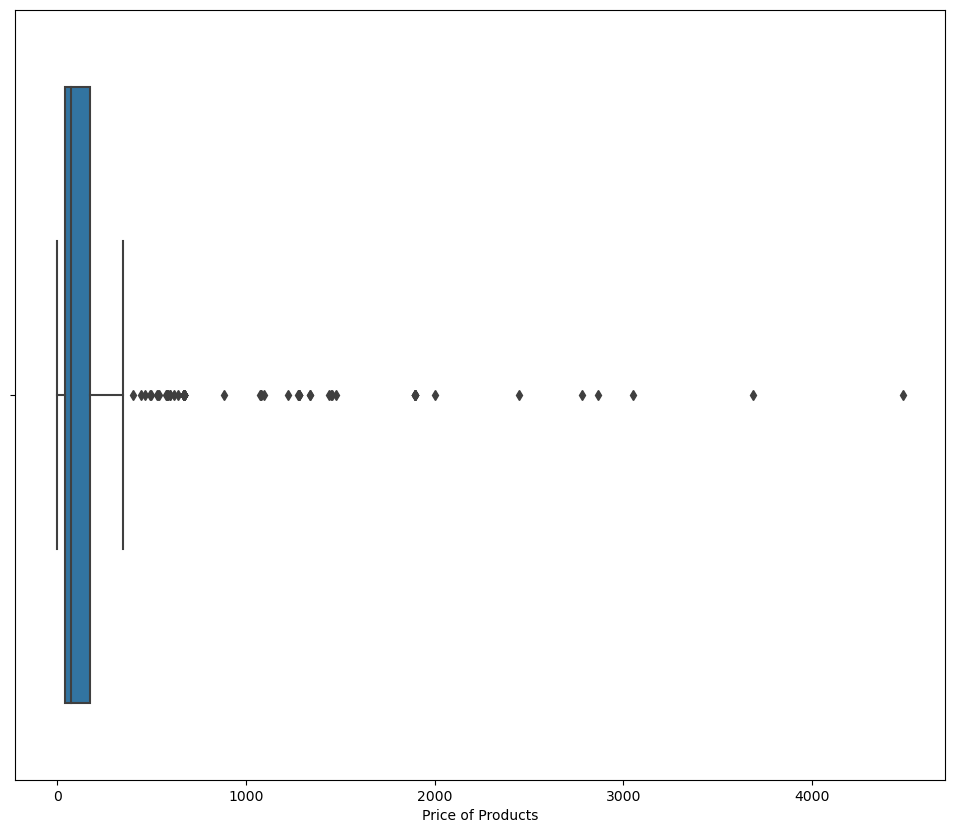

In [27]:
plt.figure(figsize=(12,10))
status_completed = data_set[data_set['status'] == 'complete']
sns.boxplot(x='total',data=status_completed)
plt.xlabel('Price of Products')



In [79]:
mean_price_completed = status_completed['total'].mean()
def var_stan_dev(data,mean):
    tmp=0
    for value in data['total']:
        tmp += (value-mean)**2
    variance = tmp/len(data['total'])
    stan_dev = variance**0.5
    return (variance,stan_dev)
#print(mean_price_completed)
var,stan_dev=var_stan_dev(status_completed,mean_price_completed)
print('Variance is: ',var)
print('Standard Deviation is: ',stan_dev)

Variance is:  232306.81459883964
Standard Deviation is:  481.9821724906842


In [80]:
import numpy as np
data_for_geo_mean = status_completed[status_completed['total'] != 0]
def Geo_Mean(data):
    tmp = np.log(data).sum()
    geo_mean = np.exp(tmp/len(data))
    return geo_mean
#print(data_for_geo_mean['total'])
print('Geometric Mean is: ',Geo_Mean(data_for_geo_mean['total']))

Geometric Mean is:  96.2530369802801


In [81]:
def Harmonic(data):
    tmp=0
    for value in data['total']:
        tmp += (1/value)
    har_mean = (len(data)/tmp)
    return har_mean
#print(mean_price_completed)
print('Harmonic mean is: ', Harmonic(data_for_geo_mean))

Harmonic mean is:  53.918394602482785


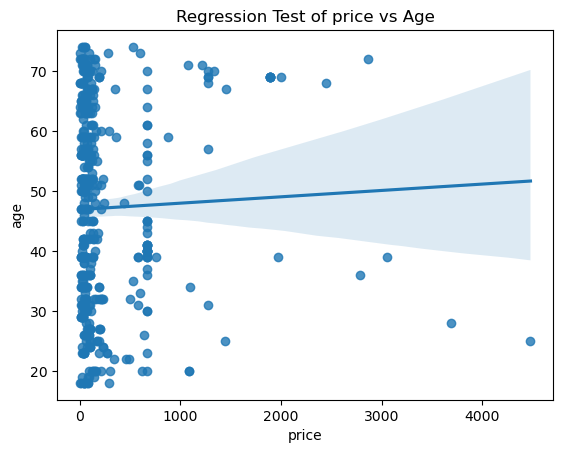

In [82]:
sns.regplot(x='price', y='age',data=status_completed)
plt.title('Regression Test of price vs Age')
plt.show()

In [86]:
def range_and_coefficient_of_range(data):
    max_value=data['total'].max()
    min_value=data['total'].min()
    Range=max_value-min_value
    Co_range=Range/(max_value+min_value)
    return (Range,Co_range)
Range,coefficient_of_range=range_and_coefficient_of_range(status_completed)
print('The range of Data set is: ', Range)
print('The Coeffiecient of Range is: ',coefficient_of_range)

The range of Data set is:  4479.2
The Coeffiecient of Range is:  1.0


Text(0.5, 1.0, 'Demand of Different Types of products')

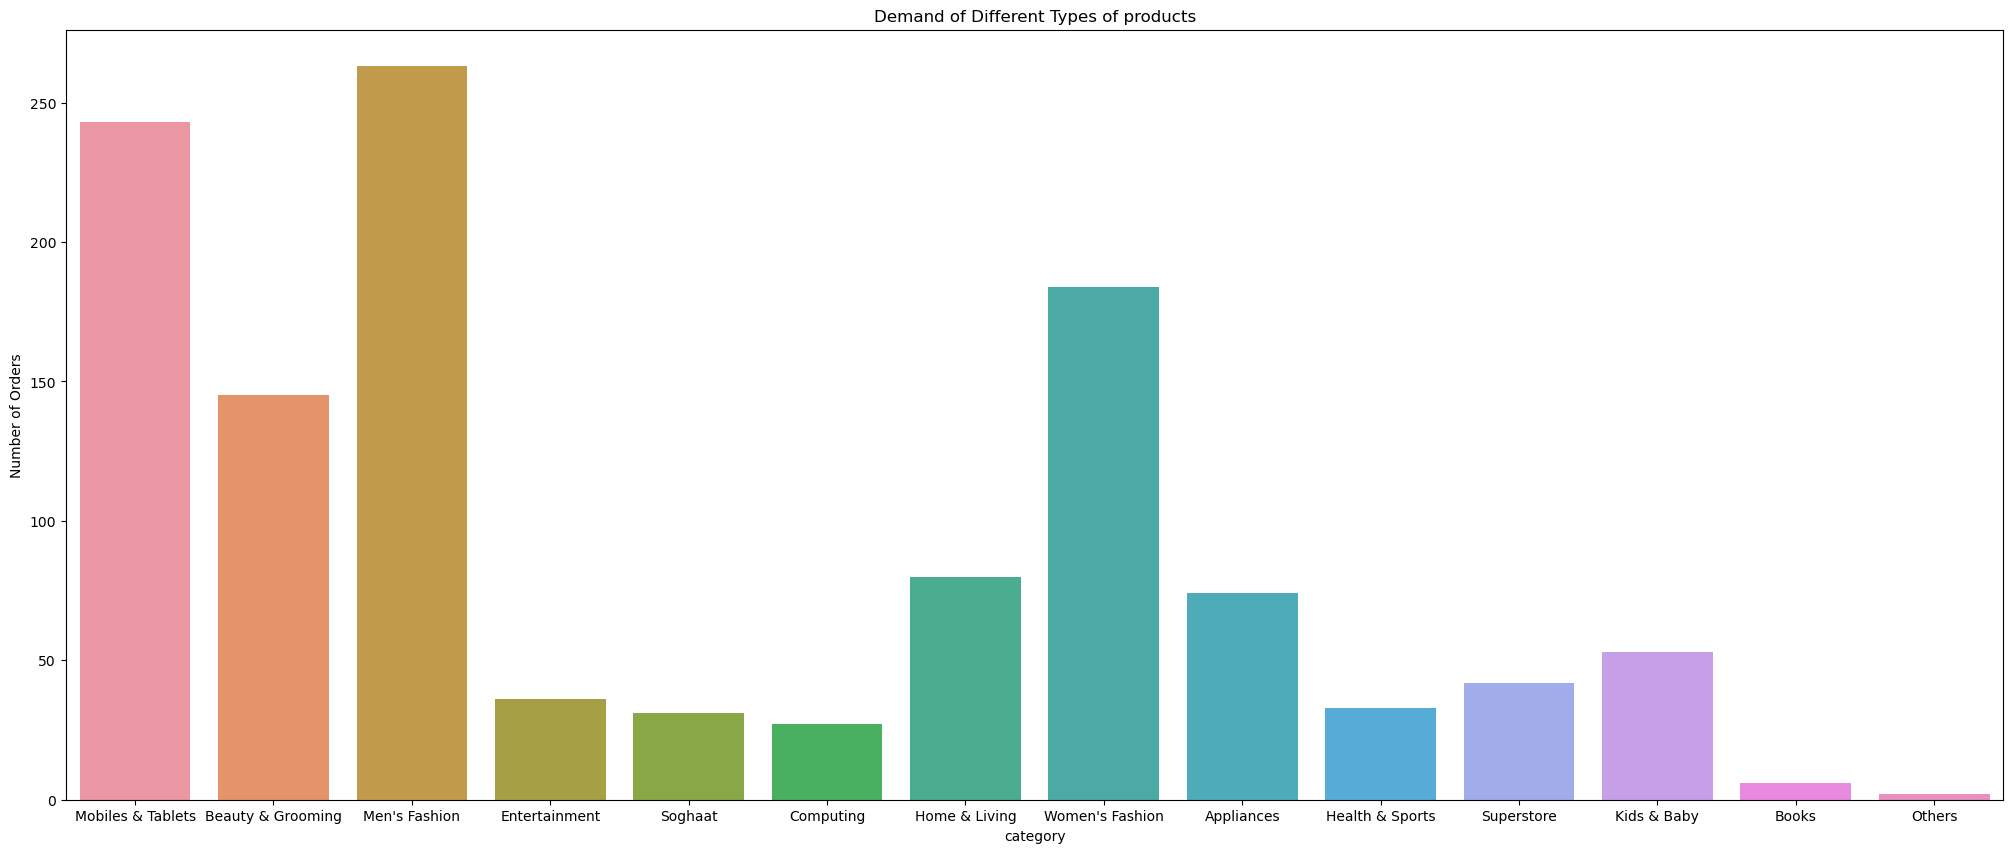

In [96]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.countplot(x='category', data= data_set)
plt.ylabel('Number of Orders')
plt.title('Demand of Different Types of products')

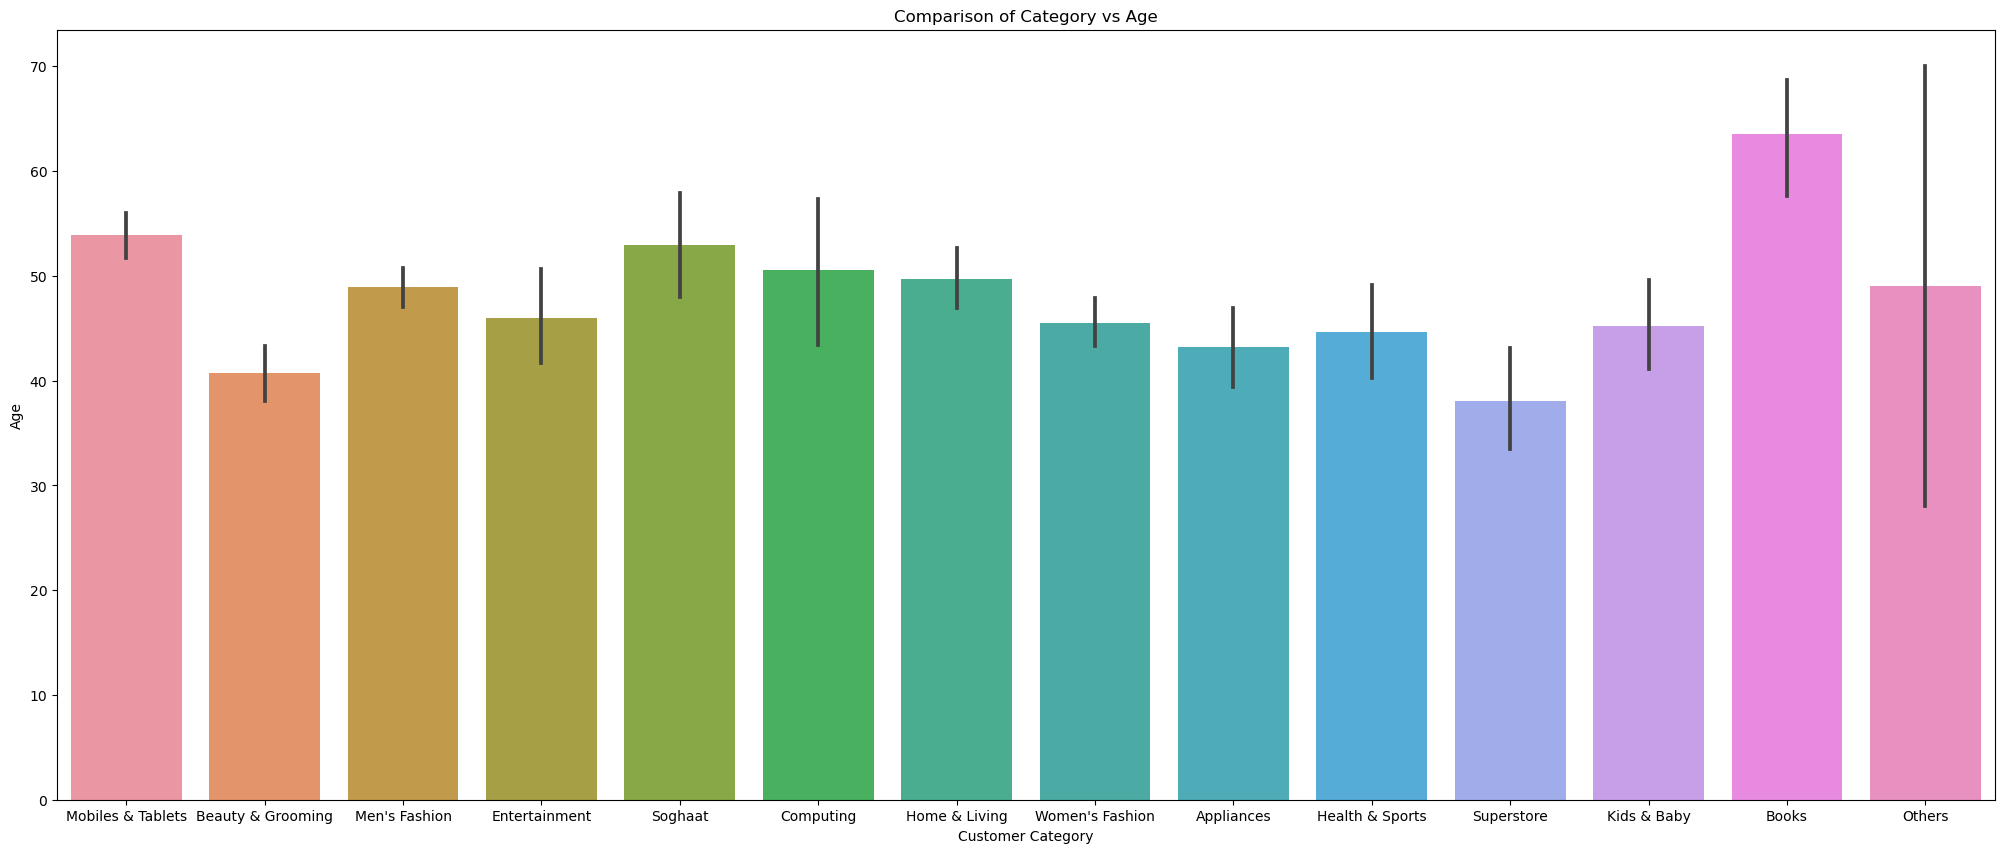

In [98]:
sns.barplot(x=data_set['category'], y=data_set['age'])
plt.xlabel('Customer Category')
plt.ylabel('Age')
plt.title('Comparison of Category vs Age')
plt.show()